In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Youtube adview data.csv")

In [3]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data.shape

(14999, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [6]:
# Convering the object value to integer value
col_name = ['views', 'likes', 'dislikes', 'comment']
for col in col_name:
    # Removing 'F' from each column
    data[col] = data[col].replace('F', 0)
    # Converting to numberic
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Converting to integer
    data[col] = data[col].astype('Int64')

In [7]:
# Replace categorical value with numerical value
category_dict = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data['category'] = data['category'].map(category_dict)

In [8]:
# Using LabelEncoding to convert the caategorical value to numerical value
from sklearn.preprocessing import LabelEncoder
data['vidid'] = LabelEncoder().fit_transform(data['vidid'])
data['published'] = LabelEncoder().fit_transform(data['published'])

In [9]:
import re
def duration_to_seconds(duration):
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if match:
        hour = int(match.group(1)) if match.group(1) else 0
        minute = int(match.group(2)) if match.group(2) else 0
        sec = int(match.group(3)) if match.group(3) else 0
        
        total_sec = hour * 3600 + minute * 60 + sec
        return total_sec
    else:
        return None

In [10]:
data['duration'] = data['duration'].apply(duration_to_seconds)

In [11]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,457,6
1,2869,2,1707,56,2,6,2187,570,4
2,8339,1,2023,25,0,2,2096,136,3
3,9215,6,620860,777,161,153,2121,262,8
4,123,1,666,1,0,0,2093,31,4


In [12]:
data.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

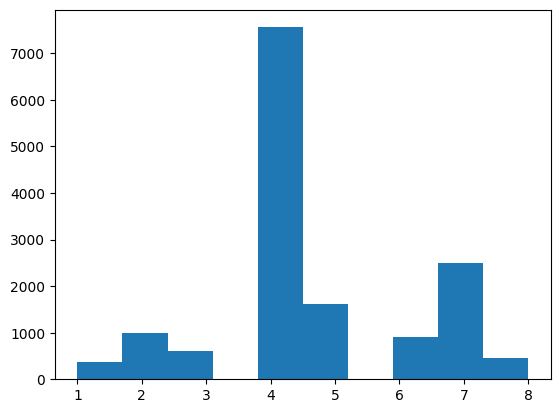

In [13]:
plt.hist(data['category'])
plt.show()

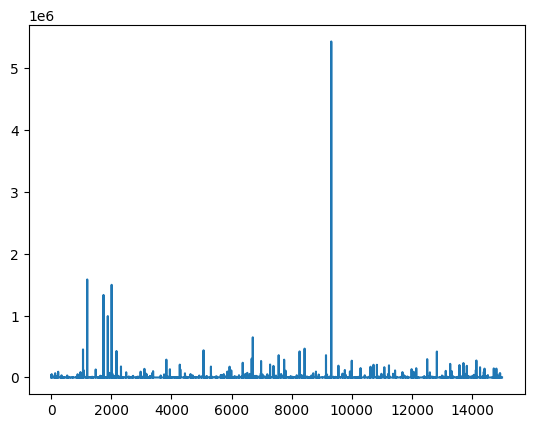

In [14]:
plt.plot(data['adview'])
plt.show()

In [15]:
data = data[data['adview']<2000000]

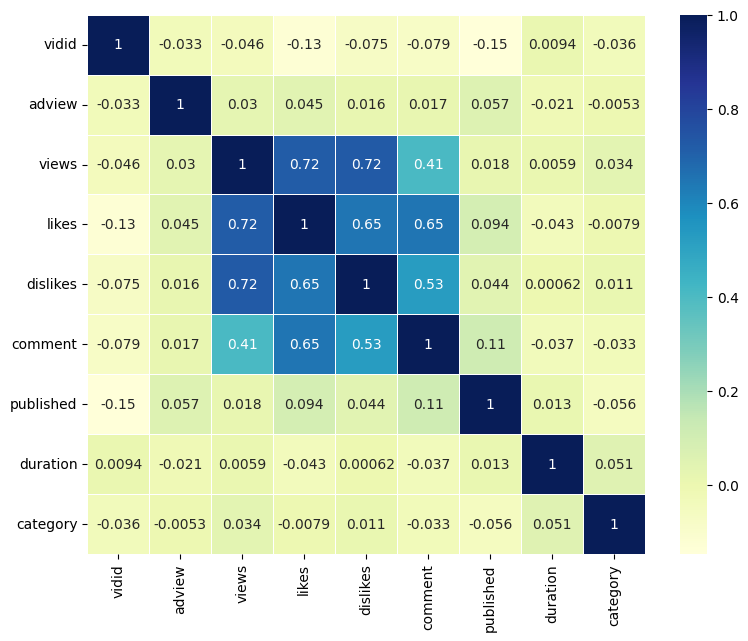

In [16]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', linewidth =0.5)
plt.show()

In [17]:
Y = pd.DataFrame(data = data.iloc[:,1].values, columns=["target"])

data = data.drop(['vidid'], axis=1)
data = data.drop(['adview'], axis=1)

data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2170,457,6
1,1707,56,2,6,2187,570,4
2,2023,25,0,2,2096,136,3
3,620860,777,161,153,2121,262,8
4,666,1,0,0,2093,31,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state = 50)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Square Error: ", metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
print_error(X_test, y_test, linear)

Mean Absolute Error:  3504.366652001073
Mean Square Error:  971811246.9064014
Root Mean Squared Error:  59.19769127255786


In [22]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error:  4548.4783333333335
Mean Square Error:  1682372870.317
Root Mean Squared Error:  67.44240752918992


In [23]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 25)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error:  3677.223133333333
Mean Square Error:  1058420664.7549531
Root Mean Squared Error:  60.64011158740832


In [24]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
print_error(X_test, y_test, svm)

C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:  1427.258958681003
Mean Square Error:  975196012.8557311
Root Mean Squared Error:  37.77908096660112


In [25]:
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation="relu", input_shape = X_train.shape[1:]),
    Dense(6, activation="relu"),
    Dense(1)
])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ["mean_squared_error"])

ann.fit(X_train, y_train, epochs =1000)

Epoch 1/1000


C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 656023808.0000 - mean_squared_error: 656023808.0000
Epoch 2/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 667038848.0000 - mean_squared_error: 667038848.0000
Epoch 3/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 687102976.0000 - mean_squared_error: 687102976.0000
Epoch 4/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 1089093632.0000 - mean_squared_error: 1089093632.0000
Epoch 5/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 649043200.0000 - mean_squared_error: 649043200.0000
Epoch 6/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 556509632.0000 - mean_squared_error: 556509632.0000
Epoch 7/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 1245123840.0000 - mean_squared_error: 1245123840.0000
Epoch 8/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 256840832.0000 - mean_squared_error: 256840832.0000
Epoch 9/1000
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 567753920.0000 - 

In [26]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

In [27]:
print_error(X_test, y_test, ann)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Absolute Error:  3000.2258201147715
Mean Square Error:  971266954.6420162
Root Mean Squared Error:  54.77431715790505


In [28]:
import joblib
joblib.dump(decision_tree, "linear_regression.pkl")

['linear_regression.pkl']

In [29]:
ann.save("ann_model.h5")